# AIML Reference-Regression & Classification

- <a href = #link_data>Data Reading and Preprocessing</a>
    - <a href = #link_LinearRegression>pandas_profiling</a>
- <a href = #link_bivariate>Bivariate Analysis</a>
- <a href = #link_visualization>Visualization</a>
- <a href = #link_feature>Feature Engineering</a>
    - <a href = #link_train>Test/Train Split</a>
- <a href = #link_regression>Regression Samples</a>
    - <a href = #link_LinearRegression>LinearRegression</a>
    - <a href = #link_LinearRegressionwithPolynomialFeatures>LinearRegression with PolynomialFeatures</a>
    - <a href = #link_Coefs>Coefs of Regression</a>
    - <a href = #link_DecisionTreeRegressor>DecisionTreeRegressor</a>
    - <a href = #link_predicted>Dispaly predicted value against actual value</a>
    - <a href = #link_PolynomialFeatures>DecisionTreeRegressor with 2 degress of PolynomialFeatures</a>
    - <a href = #link_LinearRegressionk>LinearRegression (K Fold)</a>
    - <a href = #link_DecisionTreeRegressork>DecisionTreeRegressor K Fold</a>
    - <a href = #link_RandomForestRegressork>RandomForestRegressor K Fold</a>
    - <a href = #link_BaggingRegressor>BaggingRegressor</a>
    - <a href = #link_AdaBoostRegressor>AdaBoostRegressor</a>
    - <a href = #link_GradientBoostingRegressor>GradientBoostingRegressor</a>
    - <a href = #link_DataFrame>DataFrame to compare results</a>
    - <a href = #link_Grid>Grid Search on Random Forest</a>
    - <a href = #link_Gradient>Random Search on Gradient Boosting</a>
- <a href = #link_Classification>Classification Samples</a>
    - <a href = #link_prediction>Regression for classification variable prediction</a>
    - <a href = #link_Statsmodel>Regression for classification variable prediction with Statsmodel</a>
    - <a href = #link_DecisionTreeClassifier>DecisionTreeClassifier</a>
        - <a href = #link_probability>Display probability for each class</a>
        - <a href = #link_importance>Feature importance</a>
    - <a href = #link_KNeighborsClassifier>KNeighborsClassifier</a>
    - <a href = #link_RandomForestClassifier>RandomForestClassifier</a>
    - <a href = #link_AdaBoostClassifier>AdaBoostClassifier - Adaboost Ensemble Algorithm</a>
    - <a href = #link_BaggingClassifiere>BaggingClassifier</a>
    - <a href = #link_GradientBoostingClassifiere>GradientBoostingClassifier</a>
        - <a href = #link_Scaling>Scaling</a>   

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as s
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime as dt
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier

# <a id = "link_data"></a>Data Reading and Preprocessing

In [2]:
df = pd.read_csv("concrete.csv")
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [3]:
car_df = pd.read_csv("auto-mpg.csv")  

In [4]:
life_df = pd.read_csv('Life Expectancy Data.csv') 

In [5]:
prima_df = pd.read_csv("pima-indians-diabetes.csv")

In [6]:
# German credit data set
credit_df = pd.read_excel('German_Credit.xlsx')

In [7]:
risk_df = pd.read_csv('CreditRisk.csv')

In [8]:
wine_df = pd.read_csv('winequality-red.csv',sep=';')

In [9]:
credit_df2 = pd.read_csv("credit.csv")

In [10]:
hr_df = pd.read_excel('HRDataset.xlsx')

In [11]:
uber_df = pd.read_csv('uberdrive.csv')

In [12]:
dftemp1 = pd.read_csv("Flight_data.csv")  # Read the data regarding customer attributes
dftemp2 = pd.read_csv("Survey_data.csv")   # Feedback data from customers
flight_df = dftemp2.set_index("Id").join(dftemp1.set_index("ID"))

In [13]:
market_df = pd.read_csv('Data.csv')
market_df.head()

Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes

In [14]:
x_market = market_df.iloc[:, :-1].values
y_market = market_df.iloc[:, -1].values

In [15]:
x_market

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [16]:
y_market

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [17]:
(df==0).sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [18]:
df.isnull().values.any()   # Any of the values in the dataframe is a missing value

False

In [19]:
(df=='').sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [21]:
df.duplicated().sum()

25

In [22]:
# Remving duplicates
df = df.drop_duplicates()

In [23]:
df.describe(include="all")

cement         slag          ash        water  superplastic  \
count  1005.000000  1005.000000  1005.000000  1005.000000   1005.000000   
mean    278.631343    72.043483    55.536318   182.075323      6.033234   
std     104.344261    86.170807    64.207969    21.339334      5.919967   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     190.700000     0.000000     0.000000   166.600000      0.000000   
50%     265.000000    20.000000     0.000000   185.700000      6.100000   
75%     349.000000   142.500000   118.300000   192.900000     10.000000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1005.000000  1005.000000  1005.000000  1005.000000  
mean    974.376816   772.688259    45.856716    35.250378  
std      77.579667    80.340435    63.734692    16.284815  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   724.300000     7.000000    23.520000  
50%     968.000000   780.000000    28.000000    33.800000  
75%    1031.000000   822.200000    56.000000    44.870000  
max    1145.000000   992.600000   365.000000    82.600000

In [24]:
df.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age             3.253974
strength        0.395696
dtype: float64

In [25]:
df.tail(3)

cement   slag   ash  water  superplastic  coarseagg  fineagg  age  \
1027   276.4  116.0  90.3  179.6           8.9      870.1    768.3   28   
1028   342.0   38.0   0.0  228.0           0.0      932.0    670.0  270   
1029   540.0    0.0   0.0  173.0           0.0     1125.0    613.0    7   

      strength  
1027     44.28  
1028     55.06  
1029     52.61

In [26]:
df[df['age'] > 100].head()

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
51    331.0    0.0  0.0  192.0           0.0      978.0    825.0  180   
64    332.5  142.5  0.0  228.0           0.0      932.0    594.0  365   
93    427.5   47.5  0.0  228.0           0.0      932.0    594.0  180   
99    237.5  237.5  0.0  228.0           0.0      932.0    594.0  180   
103   380.0    0.0  0.0  228.0           0.0      932.0    670.0  180   

     strength  
51      39.00  
64      41.05  
93      41.84  
99      36.25  
103     53.10

In [27]:
uber_df[uber_df['PURPOSE*'].isnull()].head(10)

START_DATE*       END_DATE* CATEGORY*            START*  \
1      1/2/2016 1:25   1/2/2016 1:37  Business       Fort Pierce   
32    1/19/2016 9:09  1/19/2016 9:23  Business       Whitebridge   
85    2/9/2016 10:54  2/9/2016 11:07  Personal       Whitebridge   
86    2/9/2016 11:43  2/9/2016 11:50  Personal        Northwoods   
87    2/9/2016 13:36  2/9/2016 13:52  Personal        Tanglewood   
88    2/9/2016 13:58  2/9/2016 14:02  Personal           Preston   
89    2/9/2016 18:55  2/9/2016 19:11  Business              Cary   
102  2/13/2016 23:45  2/14/2016 0:01  Personal     East Elmhurst   
103   2/14/2016 0:50  2/14/2016 1:00  Personal   Jackson Heights   
109   2/16/2016 8:29  2/16/2016 9:34  Business  Unknown Location   

                   STOP*  MILES* PURPOSE*  
1            Fort Pierce     5.0      NaN  
32   Lake Wellingborough     7.2      NaN  
85            Northwoods     5.3      NaN  
86            Tanglewood     3.0      NaN  
87               Preston     5.1      NaN  
88           Whitebridge     1.5      NaN  
89           Morrisville     6.1      NaN  
102      Jackson Heights     2.7      NaN  
103        East Elmhurst     1.8      NaN  
109              Colombo    14.1      NaN

In [28]:
# Rename the columns to remove the * from the names
# Why ? we can use df.START_DATE same way as  df['START_DATE*']
col_names = ['START_DATE','END_DATE','CAT', 'START' , 'STOP' , 'MILES','PURPOSE']
uber_df.columns = col_names

In [29]:
uber_df['PURPOSE'].count()

653

In [30]:
uber_df[uber_df['MILES'] > 30].head()

START_DATE         END_DATE       CAT        START  \
4     1/6/2016 14:42   1/6/2016 15:49  Business  Fort Pierce   
36   1/20/2016 13:25  1/20/2016 14:19  Business      Raleigh   
108   2/16/2016 3:21   2/16/2016 4:13  Business   Katunayaka   
232  3/17/2016 12:52  3/17/2016 15:11  Business       Austin   
233  3/17/2016 15:16  3/17/2016 15:58  Business         Katy   

                 STOP  MILES         PURPOSE  
4     West Palm Beach   63.7  Customer Visit  
36               Cary   40.2  Customer Visit  
108  Unknown Location   43.7  Customer Visit  
232              Katy  136.0  Customer Visit  
233           Houston   30.2         Meeting

In [31]:
# Favorite starting point w.r.t. the total miles covered
uber_df.groupby('START')['MILES'].sum().sort_values(ascending = False ).head(10)

START
Unknown Location    1976.5
Cary                1791.3
Morrisville          671.7
Raleigh              433.0
Islamabad            401.2
Durham               384.4
Jacksonville         375.2
Latta                310.3
Asheville            287.7
Whitebridge          273.4
Name: MILES, dtype: float64

In [32]:
df[df.strength == df.strength.max()]

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
950   389.9  189.0  0.0  145.9          22.0      944.7    755.8   91   

     strength  
950      82.6

In [33]:
df.sort_values(by='strength' , ascending=False).head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
950    389.9  189.0    0.0  145.9          22.0      944.7    755.8   91   
192    315.0  137.0    0.0  145.0           5.9     1130.0    745.0   28   
1003   323.7  282.8    0.0  183.8          10.3      942.7    659.9   56   
732    540.0    0.0    0.0  162.0           2.5     1040.0    676.0   28   
257    389.9  189.0    0.0  145.9          22.0      944.7    755.8   56   
245    362.6  189.0    0.0  164.9          11.6      944.7    755.8   91   
506    451.0    0.0    0.0  165.0          11.3     1030.0    745.0   28   
190    362.6  189.0    0.0  164.9          11.6      944.7    755.8   56   
337    286.3  200.9    0.0  144.7          11.2     1004.6    803.7   91   
491    275.0  180.0  120.0  162.0          10.4      830.0    765.0   28   

      strength  
950      82.60  
192      81.75  
1003     80.20  
732      79.99  
257      79.40  
245      79.30  
506      78.80  
190      77.30  
337      76.80  
491      76.24

In [34]:
df.dtypes  

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [35]:
df.isnull().any()

cement          False
slag            False
ash             False
water           False
superplastic    False
coarseagg       False
fineagg         False
age             False
strength        False
dtype: bool

In [36]:
df[df['age']==0].head(10)

Empty DataFrame
Columns: [cement, slag, ash, water, superplastic, coarseagg, fineagg, age, strength]
Index: []

#### Rename a column if it makes sense

In [37]:
# You can also rename the specific column names 
df = df.rename( columns = {'superplastic':'super_plastic'})
df.head()

cement   slag    ash  water  super_plastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5            0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3           10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4            5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0            0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3            9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

#### Age is highly skewed

### <a id = "pandas_profiling"></a>pandas_profiling

In [38]:
import pandas_profiling 

In [39]:
pandas_profiling.ProfileReport(car_df)

In [40]:
#dropping/ignoring car_name 
car_df = car_df.drop('car name', axis=1)
# Also replacing the categorical var with actual values
car_df['origin'] = car_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car_df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

    origin  
0  america  
1  america  
2  america  
3  america  
4  america

In [41]:
car_df = pd.get_dummies(car_df, columns=['origin'])
car_df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin_america  origin_asia  origin_europe  
0               1            0              0  
1               1            0              0  
2               1            0              0  
3               1            0              0  
4               1            0              0

In [42]:
# Missing values have a'?''
# Replace missing values with NaN
car_df = car_df.replace('?', np.nan)

In [43]:
# note that the in the video of this explanation, we have imputed all the zereos. However, this might not be a good approach
# as we have other columns where we might need to keep the zeroes as they are. Ex.-pregnancy column

# Hence, we will get the imputer to run on the relevant columns only.
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=['Plas','Pres','skin','test','mass','pedi']
imputer = rep_0.fit(prima_df[cols])
prima_df[cols] = imputer.transform(prima_df[cols])



prima_df.head(10)

Preg   Plas       Pres      skin        test       mass   pedi  age  class
0     6  148.0  72.000000  35.00000  155.548223  33.600000  0.627   50      1
1     1   85.0  66.000000  29.00000  155.548223  26.600000  0.351   31      0
2     8  183.0  64.000000  29.15342  155.548223  23.300000  0.672   32      1
3     1   89.0  66.000000  23.00000   94.000000  28.100000  0.167   21      0
4     0  137.0  40.000000  35.00000  168.000000  43.100000  2.288   33      1
5     5  116.0  74.000000  29.15342  155.548223  25.600000  0.201   30      0
6     3   78.0  50.000000  32.00000   88.000000  31.000000  0.248   26      1
7    10  115.0  72.405184  29.15342  155.548223  35.300000  0.134   29      0
8     2  197.0  70.000000  45.00000  543.000000  30.500000  0.158   53      1
9     8  125.0  96.000000  29.15342  155.548223  32.457464  0.232   54      1

In [44]:
#instead of dropping the rows, lets replace the missing values with median value. 
car_df.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europe        0.0
dtype: float64

In [45]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively  (axis =0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
car_df = car_df.apply(medianFiller,axis=0)

car_df['horsepower'] = car_df['horsepower'].astype('float64')  # converting the hp column from object / string type to float

In [46]:
car_df.nunique()

mpg               129
cylinders           5
displacement       82
horsepower         94
weight            351
acceleration       95
model year         13
origin_america      2
origin_asia         2
origin_europe       2
dtype: int64

In [47]:
life_df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
Infant deaths                       209
Alcohol                            1076
Percentage expenditure             2328
Hepatitis B                          87
Measles                             958
BMI                                 608
Under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
Thinness  1-19 years                200
Thinness 5-9 years                  207
Income composition of resources     625
Schooling                           173
dtype: int64

In [48]:
pd.crosstab(credit_df['CreditAmount'],credit_df['Creditability'])

Creditability  0  1
CreditAmount       
250            0  1
276            0  1
338            0  1
339            0  1
343            0  1
...           .. ..
15653          0  1
15672          1  0
15857          0  1
15945          1  0
18424          1  0

[923 rows x 2 columns]

In [49]:
risk_df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [50]:
pd.crosstab(credit_df['CreditAmount'],credit_df['Creditability'],normalize='columns')
# it shows % distribution of each class in different interval of CreditAmount

Creditability         0         1
CreditAmount                     
250            0.000000  0.001429
276            0.000000  0.001429
338            0.000000  0.001429
339            0.000000  0.001429
343            0.000000  0.001429
...                 ...       ...
15653          0.000000  0.001429
15672          0.003333  0.000000
15857          0.000000  0.001429
15945          0.003333  0.000000
18424          0.003333  0.000000

[923 rows x 2 columns]

In [51]:
prima_df.groupby("class").agg({'class': 'count'})

class
class       
0        500
1        268

In [52]:
prima_df.corr()

Preg      Plas      Pres      skin      test      mass      pedi  \
Preg   1.000000  0.127911  0.208522  0.082989  0.056027  0.021565 -0.033523   
Plas   0.127911  1.000000  0.218367  0.192991  0.420157  0.230941  0.137060   
Pres   0.208522  0.218367  1.000000  0.192816  0.072517  0.281268 -0.002763   
skin   0.082989  0.192991  0.192816  1.000000  0.158139  0.542398  0.100966   
test   0.056027  0.420157  0.072517  0.158139  1.000000  0.166586  0.098634   
mass   0.021565  0.230941  0.281268  0.542398  0.166586  1.000000  0.153400   
pedi  -0.033523  0.137060 -0.002763  0.100966  0.098634  0.153400  1.000000   
age    0.544341  0.266534  0.324595  0.127872  0.136734  0.025519  0.033561   
class  0.221898  0.492928  0.166074  0.215299  0.214411  0.311924  0.173844   

            age     class  
Preg   0.544341  0.221898  
Plas   0.266534  0.492928  
Pres   0.324595  0.166074  
skin   0.127872  0.215299  
test   0.136734  0.214411  
mass   0.025519  0.311924  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

In [53]:
## Define X and Y variables
X_risk = risk_df.drop('Loan_Status', axis=1)
Y_risk = risk_df[['Loan_Status']]

In [54]:
#Convert categorical vriables to dummy variables
X_risk = pd.get_dummies(X_risk, drop_first=True)

In [55]:
#Combine 7&8 together; combine 3 and 4 with 5 so that we have only 3 levels and a more balanced Y variable
wine_df['quality'] = wine_df['quality'].replace(8,7)
wine_df['quality'] = wine_df['quality'].replace(3,5)
wine_df['quality'] = wine_df['quality'].replace(4,5)
wine_df['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

In [56]:
for feature in credit_df2.columns: # Loop through all columns in the dataframe
    if credit_df2[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_df2[feature] = pd.Categorical(credit_df2[feature])# Replace strings with an integer
credit_df2.head(10)

checking_balance  months_loan_duration credit_history               purpose  \
0           < 0 DM                     6       critical  furniture/appliances   
1       1 - 200 DM                    48           good  furniture/appliances   
2          unknown                    12       critical             education   
3           < 0 DM                    42           good  furniture/appliances   
4           < 0 DM                    24           poor                   car   
5          unknown                    36           good             education   
6          unknown                    24           good  furniture/appliances   
7       1 - 200 DM                    36           good                   car   
8          unknown                    12           good  furniture/appliances   
9       1 - 200 DM                    30       critical                   car   

   amount savings_balance employment_duration  percent_of_income  \
0    1169         unknown           > 7 years                  4   
1    5951        < 100 DM         1 - 4 years                  2   
2    2096        < 100 DM         4 - 7 years                  2   
3    7882        < 100 DM         4 - 7 years                  2   
4    4870        < 100 DM         1 - 4 years                  3   
5    9055         unknown         1 - 4 years                  2   
6    2835   500 - 1000 DM           > 7 years                  3   
7    6948        < 100 DM         1 - 4 years                  2   
8    3059       > 1000 DM         4 - 7 years                  2   
9    5234        < 100 DM          unemployed                  4   

   years_at_residence  age other_credit housing  existing_loans_count  \
0                   4   67         none     own                     2   
1                   2   22         none     own                     1   
2                   3   49         none     own                     1   
3                   4   45         none   other                     1   
4                   4   53         none   other                     2   
5                   4   35         none   other                     1   
6                   4   53         none     own                     1   
7                   2   35         none    rent                     1   
8                   4   61         none     own                     1   
9                   2   28         none     own                     2   

          job  dependents phone default  
0     skilled           1   yes      no  
1     skilled           1    no     yes  
2   unskilled           2    no      no  
3     skilled           2    no      no  
4     skilled           2    no     yes  
5   unskilled           2   yes      no  
6     skilled           1    no      no  
7  management           1   yes      no  
8   unskilled           1    no      no  
9  management           1    no     yes

In [57]:
credit_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [58]:
replaceStruct = {
                "checking_balance":     {"< 0 DM": 1, "1 - 200 DM": 2 ,"> 200 DM": 3 ,"unknown":-1},
                "credit_history": {"critical": 1, "poor":2 , "good": 3, "very good": 4,"perfect": 5},
                 "savings_balance": {"< 100 DM": 1, "100 - 500 DM":2 , "500 - 1000 DM": 3, "> 1000 DM": 4,"unknown": -1},
                 "employment_duration":     {"unemployed": 1, "< 1 year": 2 ,"1 - 4 years": 3 ,"4 - 7 years": 4 ,"> 7 years": 5},
                "phone":     {"no": 1, "yes": 2 },
                #"job":     {"unemployed": 1, "unskilled": 2, "skilled": 3, "management": 4 },
                "default":     {"no": 0, "yes": 1 } 
                    }
oneHotCols=["purpose","housing","other_credit","job"]

In [59]:
# Manual label encoding
flight_df.replace({'extremely poor' : 0, 'poor' : 1, 'need improvement' : 2, 'acceptable' : 3, 
            'good' : 4, 'excellent' : 5}, inplace = True)  

flight_df.replace({'very inconvinient' : 0, 'Inconvinient' : 1, 'need improvement' : 2, 'manageable' : 3,
            'Convinient' : 4, 'very convinient' : 5}, inplace = True)

In [60]:
credit_df2=credit_df2.replace(replaceStruct)
credit_df2=pd.get_dummies(credit_df2, columns=oneHotCols)
credit_df2.head()

checking_balance  months_loan_duration  credit_history  amount  \
0                 1                     6               1    1169   
1                 2                    48               3    5951   
2                -1                    12               1    2096   
3                 1                    42               3    7882   
4                 1                    24               2    4870   

   savings_balance  employment_duration  percent_of_income  \
0               -1                    5                  4   
1                1                    3                  2   
2                1                    4                  2   
3                1                    4                  2   
4                1                    3                  3   

   years_at_residence  age  existing_loans_count  ...  housing_other  \
0                   4   67                     2  ...              0   
1                   2   22                     1  ...              0   
2                   3   49                     1  ...              0   
3                   4   45                     1  ...              1   
4                   4   53                     2  ...              1   

   housing_own  housing_rent  other_credit_bank  other_credit_none  \
0            1             0                  0                  1   
1            1             0                  0                  1   
2            1             0                  0                  1   
3            0             0                  0                  1   
4            0             0                  0                  1   

   other_credit_store  job_management  job_skilled  job_unemployed  \
0                   0               0            1               0   
1                   0               0            1               0   
2                   0               0            0               0   
3                   0               0            1               0   
4                   0               0            1               0   

   job_unskilled  
0              0  
1              0  
2              1  
3              0  
4              0  

[5 rows x 29 columns]

In [61]:
today = pd.to_datetime('today') # today's date and time.

In [62]:
hr_df['Age'] = (today.year - hr_df['DOB'].dt.year) # the age (in years) is "DOB" subtracted from today's date.

In [63]:
hr_df.head()

Employee_Name       EmpID  MarriedID  MaritalStatusID  GenderID  \
0            Brown, Mia  1103024456          1                1         0   
1  LaRotonda, William    1106026572          0                2         1   
2      Steans, Tyrone    1302053333          0                0         1   
3       Howard, Estelle  1211050782          1                1         0   
4           Singh, Nan   1307059817          0                0         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  PayRate  ...  \
0            1       1            3                       1    28.50  ...   
1            1       1            3                       0    23.00  ...   
2            1       1            3                       0    29.00  ...   
3            1       1            3                       0    21.50  ...   
4            1       1            3                       0    16.56  ...   

          ManagerName  ManagerID       RecruitmentSource PerformanceScore  \
0  Brandon R. LeBlanc          1      Diversity Job Fair      Fully Meets   
1  Brandon R. LeBlanc          1      Website Banner Ads      Fully Meets   
2  Brandon R. LeBlanc          1         Internet Search      Fully Meets   
3  Brandon R. LeBlanc          1  Pay Per Click - Google      Fully Meets   
4  Brandon R. LeBlanc          1      Website Banner Ads      Fully Meets   

   EngagementSurvey EmpSatisfaction SpecialProjectsCount  \
0              2.04               2                    6   
1              5.00               4                    4   
2              3.90               5                    5   
3              3.24               3                    4   
4              5.00               3                    5   

  LastPerformanceReview_Date DaysLateLast30 Age  
0                 2019-01-15            0.0  33  
1                 2019-01-17            0.0  36  
2                 2019-01-18            0.0  34  
3                        NaT            NaN  35  
4                 2019-01-15            0.0  32  

[5 rows x 36 columns]

##### Replace all the 0s in the column with the median of the same column value accordingly.

In [64]:
median = prima_df['Plas'][prima_df['Plas']> 0].median()
prima_df.loc[prima_df.Plas == 0, 'Plas'] = median

#### Binning

## <a id = "link_bivariate"></a>Bivariate Analysis

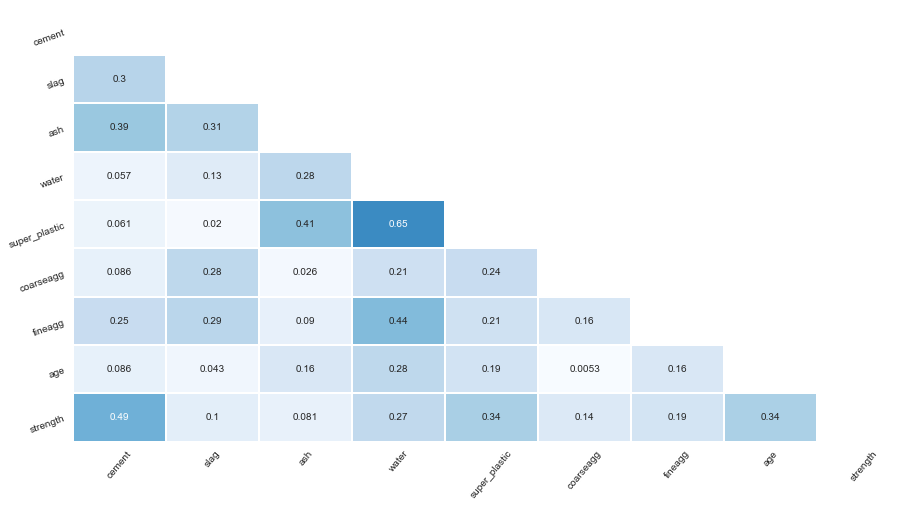

In [65]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

In [66]:
prima_df.corr()

Preg      Plas      Pres      skin      test      mass      pedi  \
Preg   1.000000  0.127911  0.208522  0.082989  0.056027  0.021565 -0.033523   
Plas   0.127911  1.000000  0.218367  0.192991  0.420157  0.230941  0.137060   
Pres   0.208522  0.218367  1.000000  0.192816  0.072517  0.281268 -0.002763   
skin   0.082989  0.192991  0.192816  1.000000  0.158139  0.542398  0.100966   
test   0.056027  0.420157  0.072517  0.158139  1.000000  0.166586  0.098634   
mass   0.021565  0.230941  0.281268  0.542398  0.166586  1.000000  0.153400   
pedi  -0.033523  0.137060 -0.002763  0.100966  0.098634  0.153400  1.000000   
age    0.544341  0.266534  0.324595  0.127872  0.136734  0.025519  0.033561   
class  0.221898  0.492928  0.166074  0.215299  0.214411  0.311924  0.173844   

            age     class  
Preg   0.544341  0.221898  
Plas   0.266534  0.492928  
Pres   0.324595  0.166074  
skin   0.127872  0.215299  
test   0.136734  0.214411  
mass   0.025519  0.311924  
pedi   0.033561  0.173844  
age    1.000000  0.238356  
class  0.238356  1.000000

In [67]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

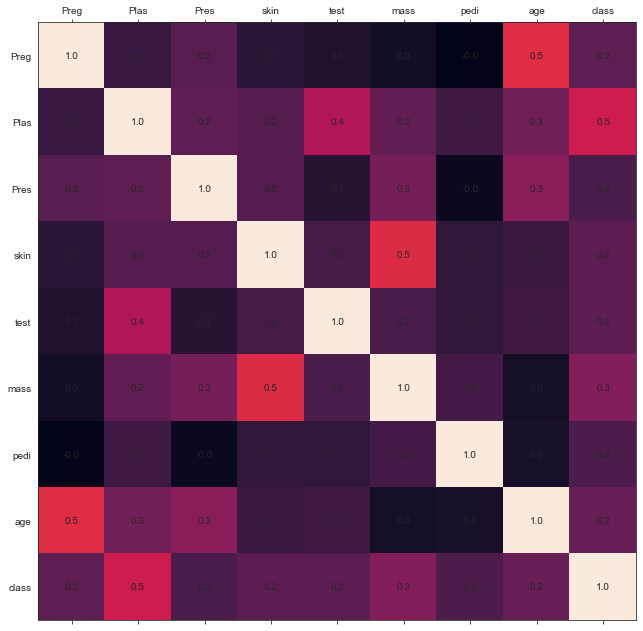

In [68]:
plot_corr(prima_df)

# <a id = "link_visualization"></a>Visualization

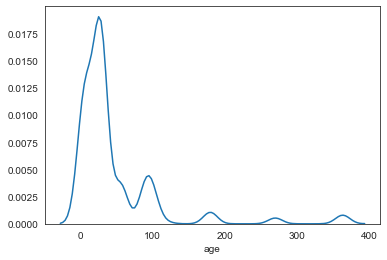

In [69]:
# To see skewness of age
sns.distplot(df['age'],hist=False)
plt.show()

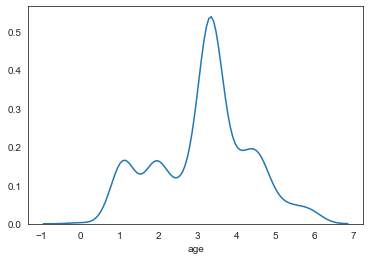

In [70]:
# Skewness of Age after log transformation
sns.distplot(np.log(df['age']),hist=False)
plt.show()

# log transformation to reduce skewness

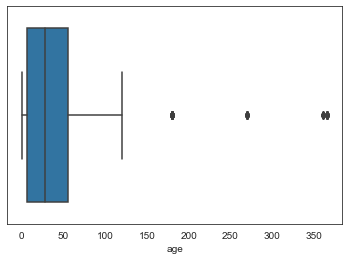

In [71]:
sns.boxplot(x=df['age'])   # box plot

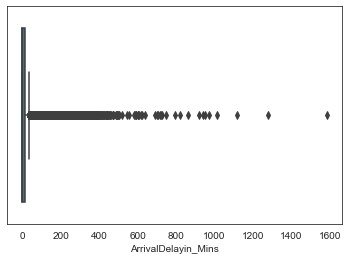

In [72]:
sns.boxplot(flight_df['ArrivalDelayin_Mins'])

In [73]:
df['age'] = np.log(df['age'])

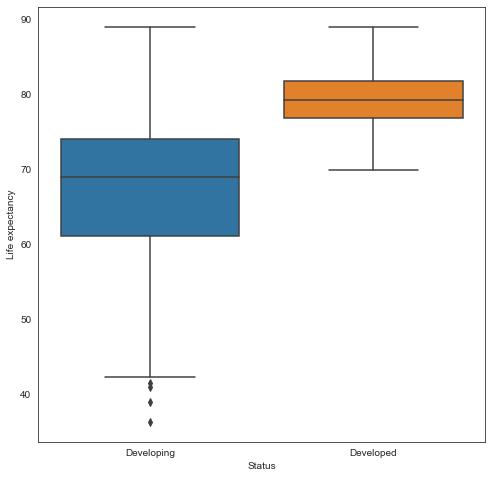

In [74]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Status",y="Life expectancy",data=life_df)
plt.show()

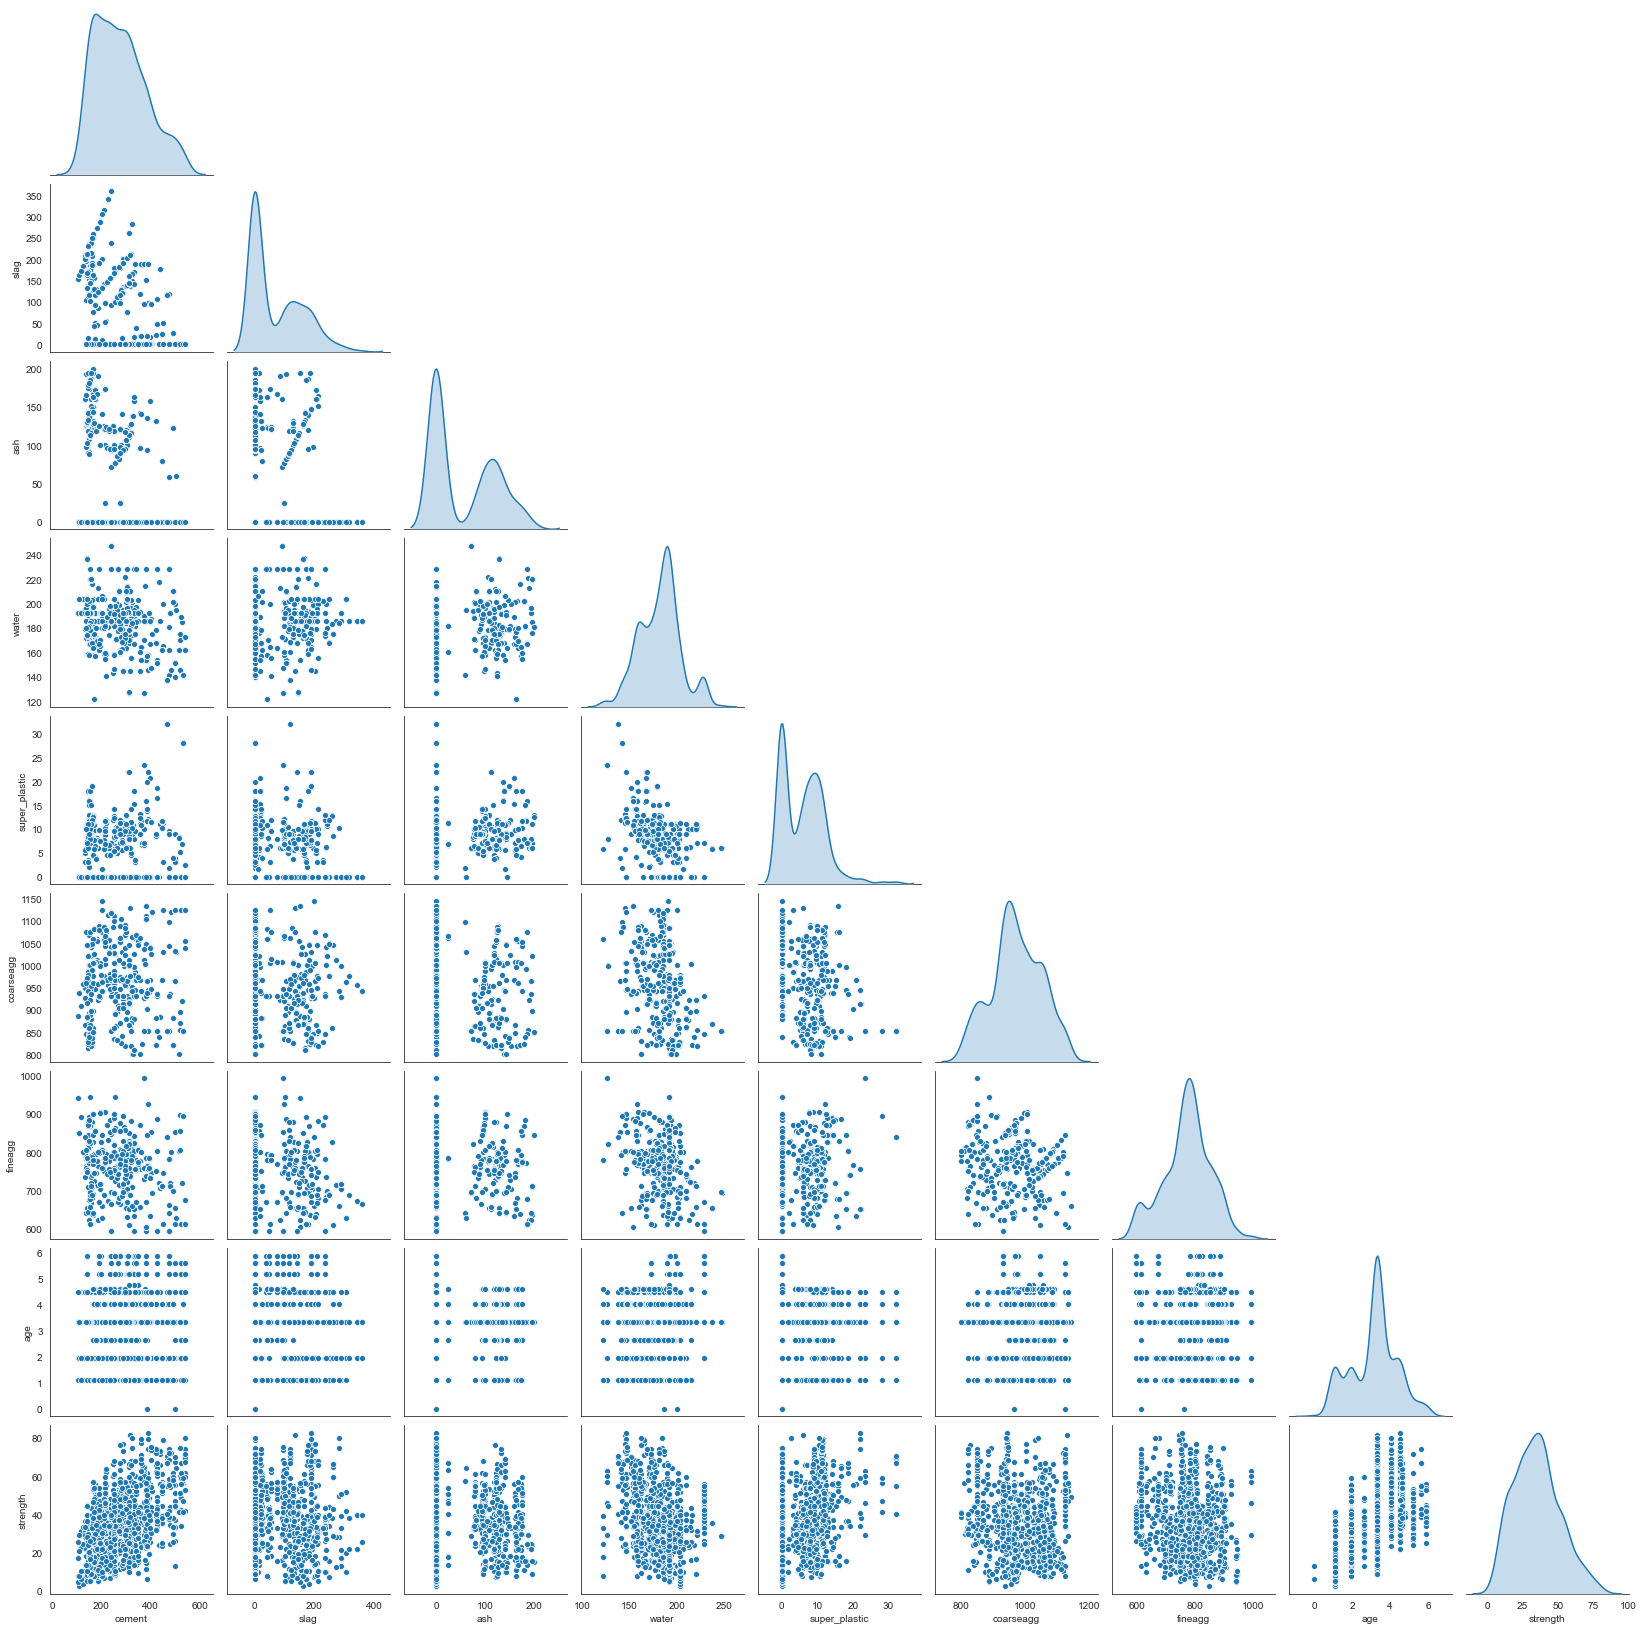

In [75]:
sns.pairplot(df , diag_kind = 'kde', corner=True )
plt.show()

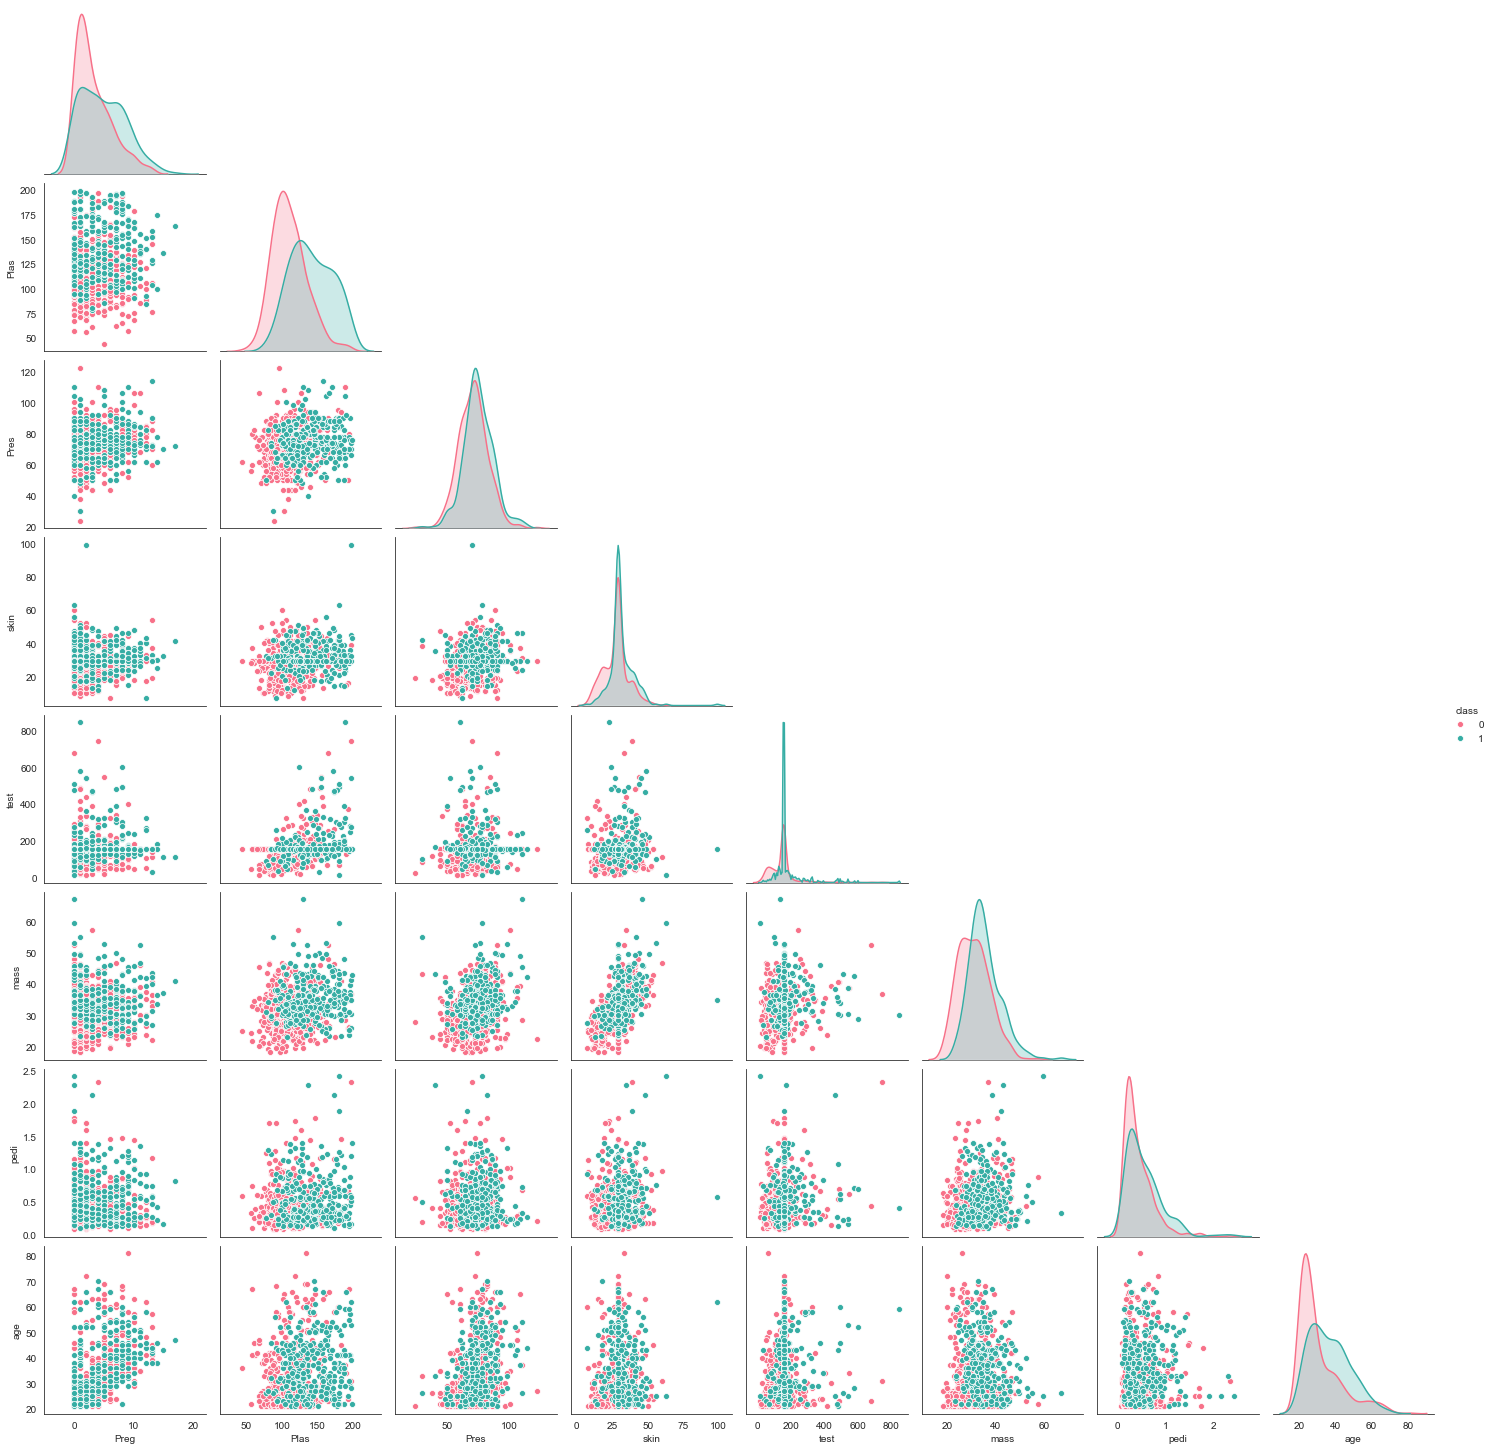

In [76]:
sns.pairplot(prima_df, hue="class", palette="husl",  corner=True )

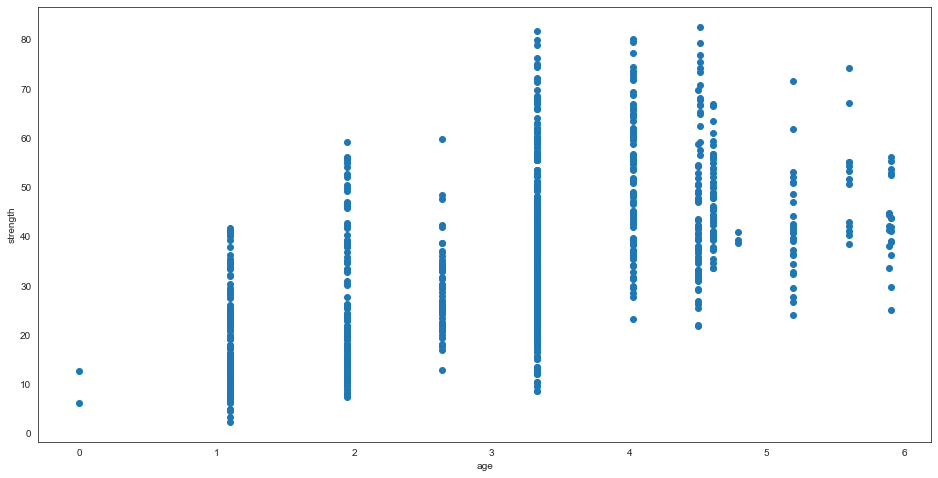

In [77]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df['age'], df['strength'])  # scatter plot
ax.set_xlabel('age')
ax.set_ylabel('strength')
plt.show()

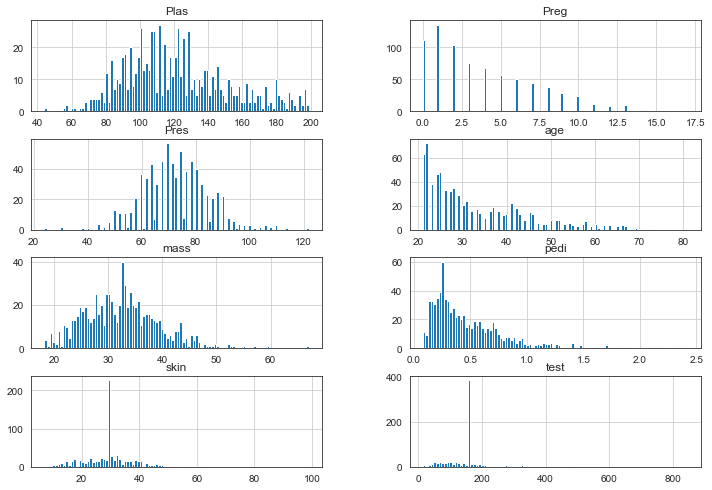

In [78]:
columns = list(prima_df)[0:-1] # Excluding Outcome column which has only 
prima_df[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 
# Histogram of first 8 columns

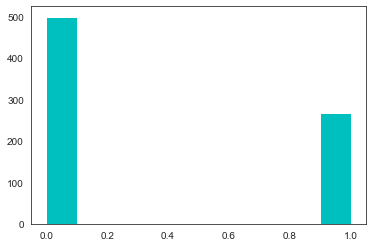

In [79]:
plt.hist(prima_df['class'], bins= 10, color='C') # used to plot histogram with 50 bins
plt.show()

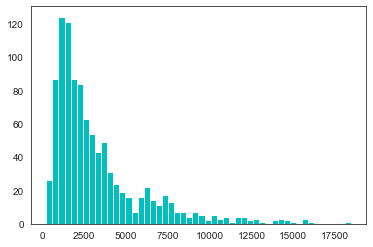

In [80]:
plt.hist(credit_df['CreditAmount'], bins= 50, color='C') # used to plot histogram with 50 bins
plt.show()

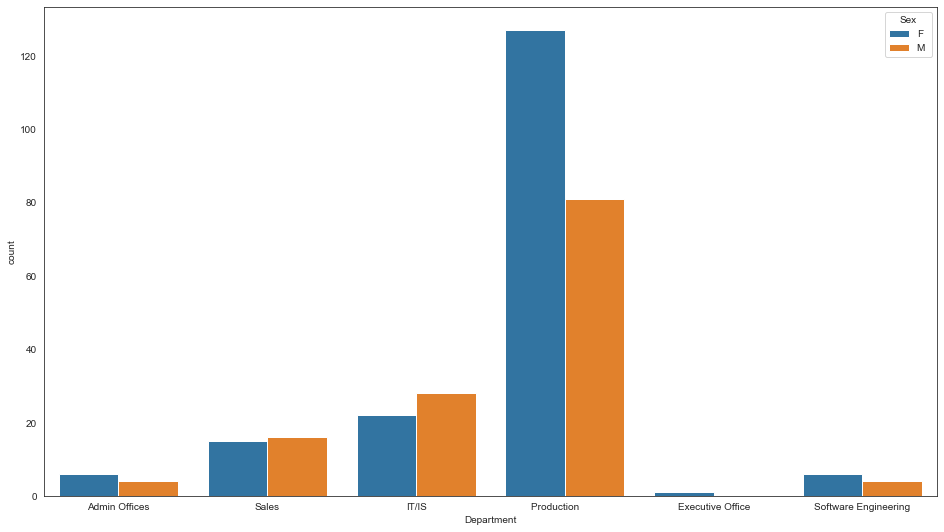

In [81]:
# Gender diversity across departmets
import seaborn as sns # import seabron library for better visualization.
plt.figure(figsize=(16,9)) # set figure size.
ax=sns.countplot(x=hr_df['Department'],hue=hr_df['Sex']) # plot of different departments vs the count of Males and Females in each.
plt.show()

In [82]:
pd.pivot_table(hr_df, index=['MaritalStatusID', 'GenderID'],
                     columns=[ 'RecruitmentSource'], aggfunc=len)

Age                                           \
RecruitmentSource        Billboard Careerbuilder Company Intranet - Partner   
MaritalStatusID GenderID                                                      
0               0              3.0           NaN                        NaN   
                1              2.0           NaN                        NaN   
1               0              6.0           NaN                        NaN   
                1              1.0           1.0                        1.0   
2               0              3.0           NaN                        NaN   
                1              NaN           NaN                        NaN   
3               0              NaN           NaN                        NaN   
                1              1.0           NaN                        NaN   
4               0              NaN           NaN                        NaN   
                1              NaN           NaN                        NaN   

                                                                         \
RecruitmentSource        Diversity Job Fair Employee Referral Glassdoor   
MaritalStatusID GenderID                                                  
0               0                       6.0               4.0       6.0   
                1                       5.0               6.0       1.0   
1               0                       6.0               4.0       3.0   
                1                       5.0              10.0       2.0   
2               0                       1.0               1.0       1.0   
                1                       4.0               2.0       1.0   
3               0                       2.0               1.0       NaN   
                1                       NaN               NaN       NaN   
4               0                       NaN               1.0       NaN   
                1                       NaN               2.0       NaN   

                                                                              \
RecruitmentSource        Indeed Information Session Internet Search MBTA ads   
MaritalStatusID GenderID                                                       
0               0           2.0                 NaN             1.0      3.0   
                1           3.0                 NaN             3.0      8.0   
1               0           1.0                 1.0             2.0      2.0   
                1           2.0                 2.0             NaN      1.0   
2               0           NaN                 NaN             NaN      3.0   
                1           NaN                 1.0             NaN      NaN   
3               0           NaN                 NaN             NaN      NaN   
                1           NaN                 NaN             NaN      NaN   
4               0           NaN                 NaN             NaN      NaN   
                1           NaN                 NaN             NaN      NaN   

                          ...                     Zip                      \
RecruitmentSource         ... On-line Web application Other Pay Per Click   
MaritalStatusID GenderID  ...                                               
0               0         ...                     NaN   3.0           NaN   
                1         ...                     NaN   NaN           NaN   
1               0         ...                     NaN   3.0           NaN   
                1         ...                     NaN   2.0           NaN   
2               0         ...                     NaN   NaN           NaN   
                1         ...                     1.0   NaN           NaN   
3               0         ...                     NaN   1.0           NaN   
                1         ...                     NaN   NaN           NaN   
4               0         ...                     NaN   NaN           NaN   
                1         ...                     NaN   NaN   

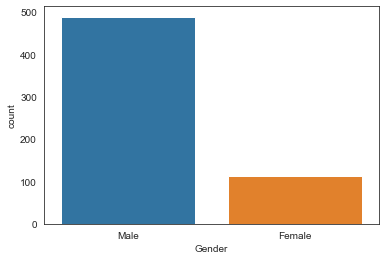

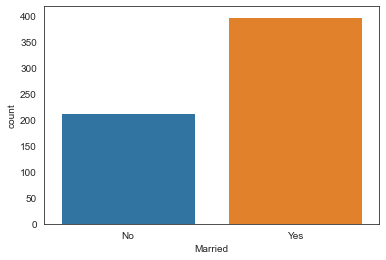

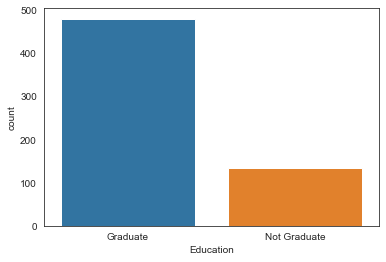

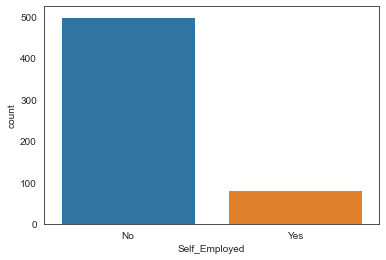

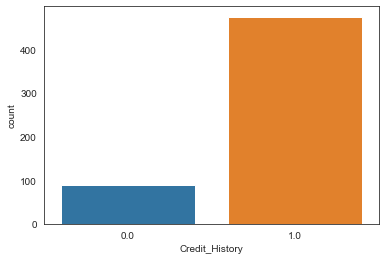

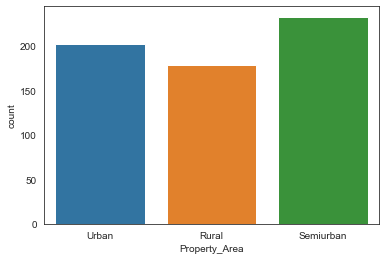

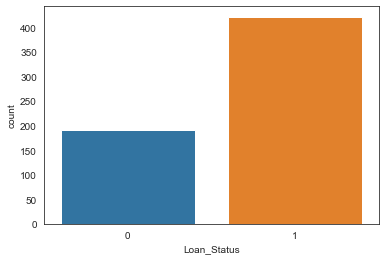

In [83]:
 for i in ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area','Loan_Status']:
     sns.countplot(risk_df[i])
     plt.show()

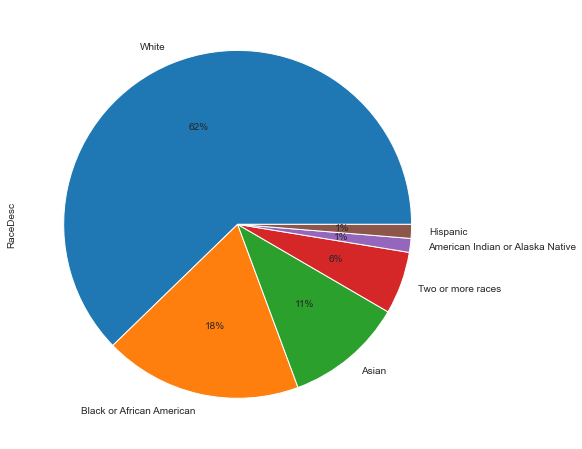

In [84]:
plt.figure(figsize=(8,8))
hr_df['RaceDesc'].value_counts().plot(kind='pie',autopct='%1.0f%%') # Pie chart representation of different Races of people.

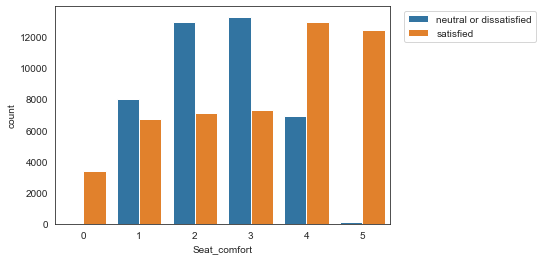

In [85]:
# We can use seaborn's countplot to plot a stacked baatchart
sns.countplot(flight_df.Seat_comfort, hue = flight_df.Satisfaction) 
plt.legend(loc = 'upper right', bbox_to_anchor=(1.45, 1))   # to place the legend in a 'good' position

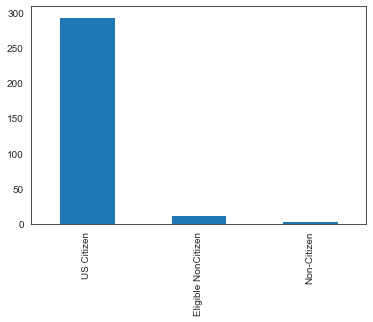

In [86]:
hr_df['CitizenDesc'].value_counts().plot(kind='bar')
plt.show()

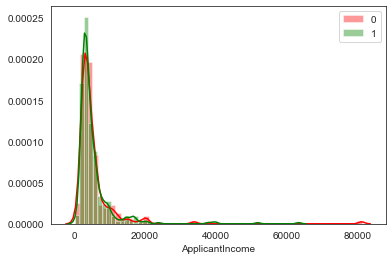

In [87]:
sns.distplot(risk_df[risk_df['Loan_Status']==0]['ApplicantIncome'],color='r',label=0)
sns.distplot(risk_df[risk_df['Loan_Status']==1]['ApplicantIncome'],color='g',label=1)
plt.legend()
plt.show()

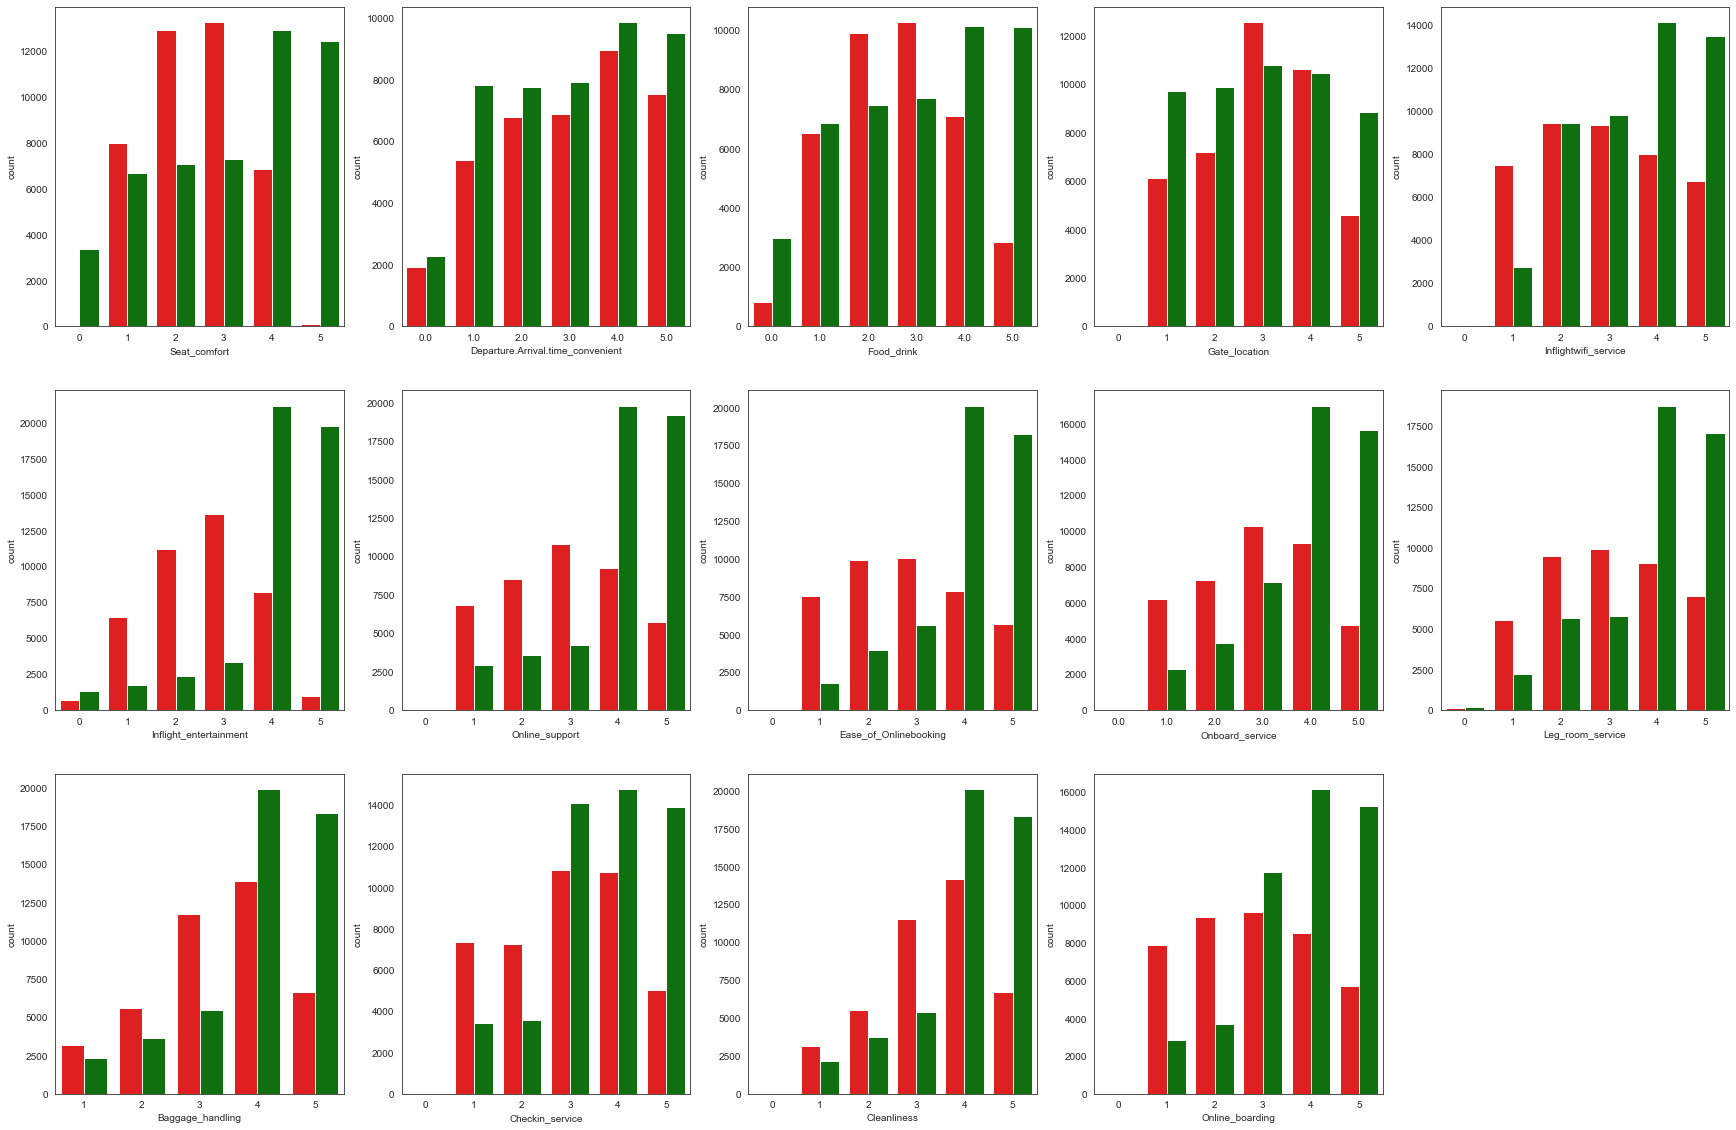

In [88]:
# Since there are a lot of columns that we want to plot, we can put all of them in one plot by using subplot()
# Additionally, since there are a lot of subplots that need to be plotted, we can use a for loop

plt.figure(figsize= (30,20))  # setting the figure size
pos = 1  # we will use this variable to index each of the plots
feedback = [ 'Seat_comfort', 'Departure.Arrival.time_convenient', 'Food_drink',
           'Gate_location', 'Inflightwifi_service','Inflight_entertainment',
           'Online_support', 'Ease_of_Onlinebooking', 'Onboard_service',
           'Leg_room_service', 'Baggage_handling','Checkin_service', 'Cleanliness', 'Online_boarding']

for i in feedback:
    plt.subplot(3, 5, pos)
    sns.countplot(flight_df[i], hue = flight_df.Satisfaction,
                  palette = {'satisfied':'green','neutral or dissatisfied': 'red'})
    plt.legend().remove()   #Remove legend to make the entire plot look 'good'
    pos += 1  # to plot over the grid one by one  

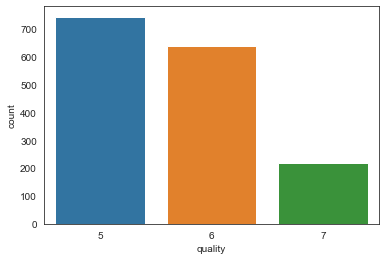

In [89]:
sns.countplot(wine_df['quality'])

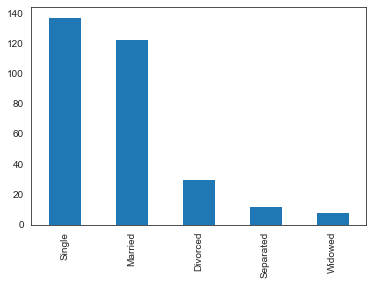

In [90]:
hr_df['MaritalDesc'].value_counts().plot(kind='bar')

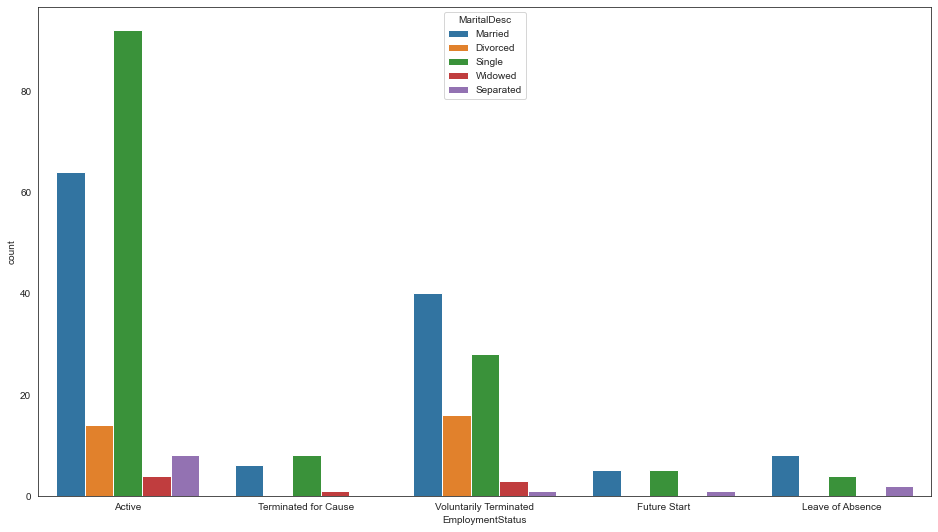

In [91]:
plt.figure(figsize=(16,9))
ax=sns.countplot(x=hr_df['EmploymentStatus'],hue=hr_df['MaritalDesc'])

## <a id = "link_feature"></a>Feature Engineering

In [92]:
df['water:cement'] = df['water']/df['cement']  # Extracting a new column

In [93]:
df['coarseagg:fineagg'] = df['coarseagg'] / df['fineagg'] # Extracting a new column

In [94]:
df = df[['cement', 'slag', 'ash', 'water', 'super_plastic', 'coarseagg',
       'fineagg', 'age', 'water:cement', 'coarseagg:fineagg', 'strength']] # rearranging columns

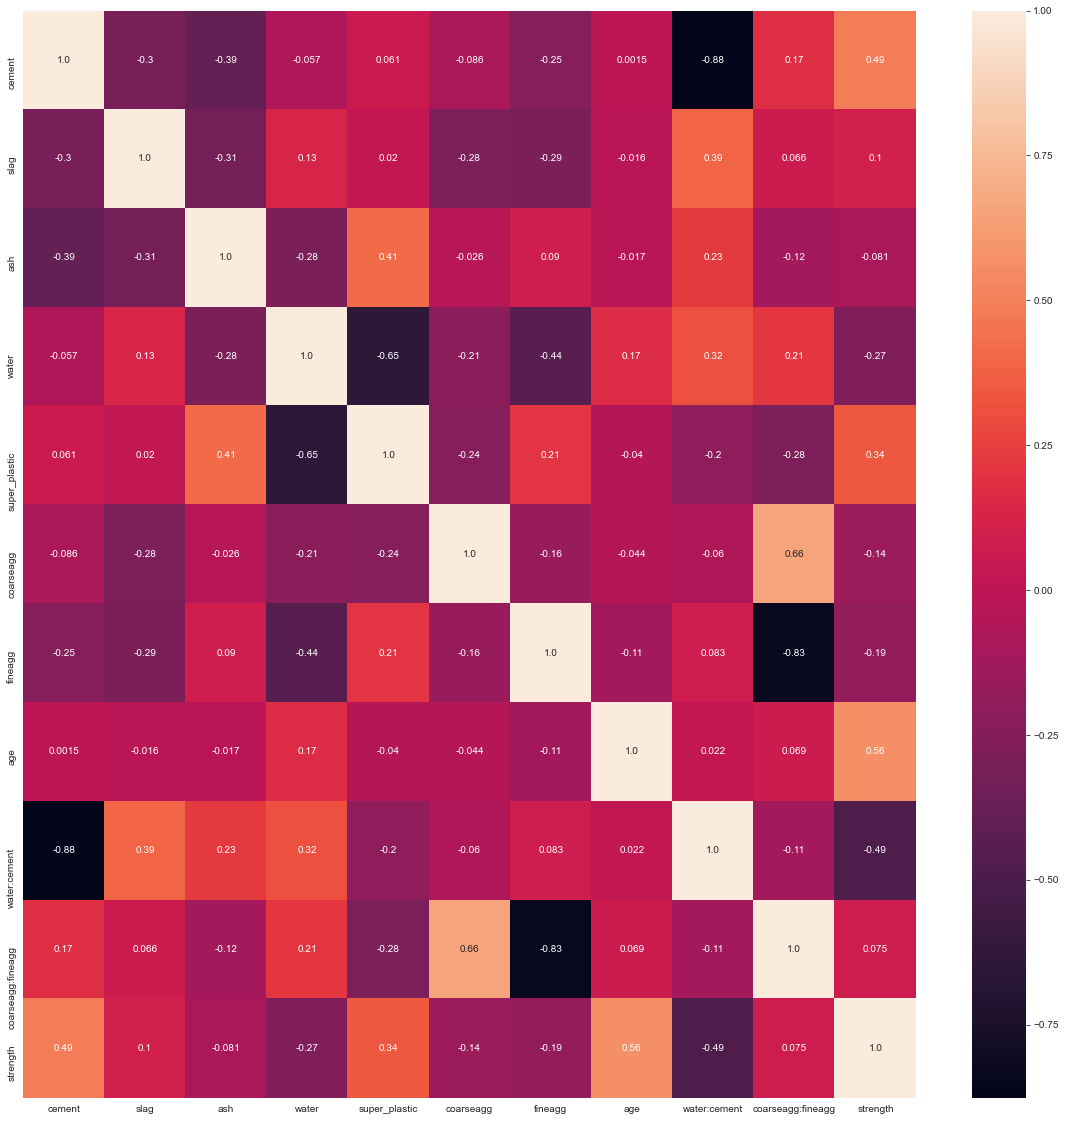

In [95]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, fmt=".2")
plt.show()

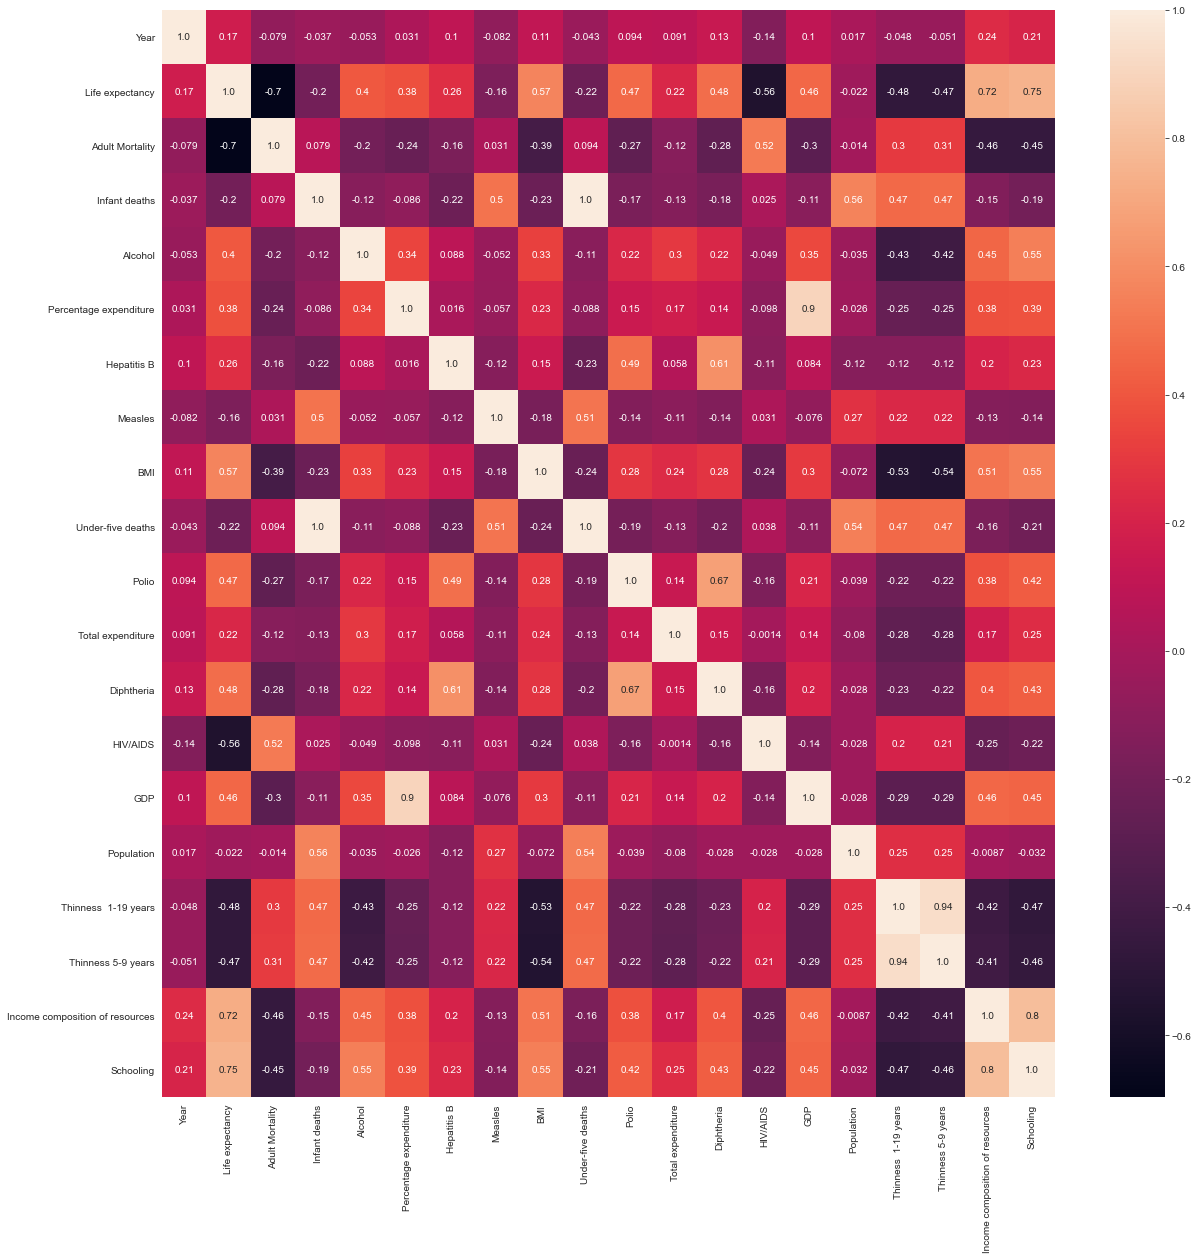

In [96]:
plt.figure(figsize=(20,20))
sns.heatmap(life_df.corr(), annot=True, fmt=".2")
plt.show()

So we can have w:c a feature in place of water and cement because it shows high correlation with strength

coarseagg:fineagg doesnt look good so we will drop it

In [97]:
df = df.drop(['cement','water','coarseagg:fineagg'],axis=1)

## <a id = "link_train"></a>Test/Train Split

In [98]:
# Separating dependent and independent variables
x = df.drop('strength',axis=1)
y = df['strength']

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [100]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

69.95% data is in training set
30.05% data is in test set


# <a id = "link_regression"></a>Regression Samples

### <a id = "link_LinearRegression"></a>LinearRegression

In [101]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [102]:
print(regression_model.score(x_train, y_train))
print(regression_model.score(x_test, y_test))

0.7464493261654619
0.7461520650870197


#### <a id = "link_Coefs"></a>Coefs of Regression

In [103]:
a = regression_model.coef_
coeff_data = pd.DataFrame()
coeff_data['Coefs'] = regression_model.coef_
coeff_data['Feature'] = x_train.columns
coeff_data = coeff_data.append({'Coefs': regression_model.intercept_, 'Feature': "Intercept"}, ignore_index = True)
coeff_data

Coefs        Feature
0   0.079456           slag
1   0.029280            ash
2   0.488796  super_plastic
3  -0.000723      coarseagg
4   0.005247        fineagg
5   8.136008            age
6 -33.757652   water:cement
7  21.145109      Intercept

In [104]:
linearregression_normalized = LinearRegression(normalize=True)                            # Linear Regression with hyperparameter normalize=True.             
linearregression_normalized.fit(x_train, y_train)
print(linearregression_normalized.score(x_train, y_train))
print(linearregression_normalized.score(x_test, y_test))

0.7464493261654619
0.7461520650870199


### <a id = "link_LinearRegressionwithPolynomialFeatures"></a>LinearRegression with PolynomialFeatures

In [105]:
poly = PolynomialFeatures(degree=6, interaction_only=True)
x_train2 = poly.fit_transform(x_train)
x_test2 = poly.fit_transform(x_test)

poly_clf = LinearRegression()

poly_clf.fit(x_train2, y_train)

y_pred = poly_clf.predict(x_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(x_train2, y_train))

0.894933675746185


In [106]:
# but this improves as the cost of several extra variables!
print(x_train.shape)
print(x_train2.shape)

(703, 7)
(703, 127)


### <a id = "link_DecisionTreeRegressor"></a>DecisionTreeRegressor

In [107]:
model = DecisionTreeRegressor(random_state=7)

model.fit(x_train,y_train)

print(model.score(x_train,y_train))

print(model.score(x_test,y_test))

0.9961253299308925
0.8338303458979717


### <a id = "link_predicted"></a>Dispaly predicted value against actual value

In [108]:
y_pred = model.predict(x_test)
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df_pred.head(10)

Actual  Predicted
113   31.35      39.58
809    7.72      10.35
756   15.61      15.82
435   48.40      59.76
242   26.20      21.97
421   13.29      13.29
489   64.30      65.20
270   55.16      47.22
485   27.87      20.59
670   23.14      21.91

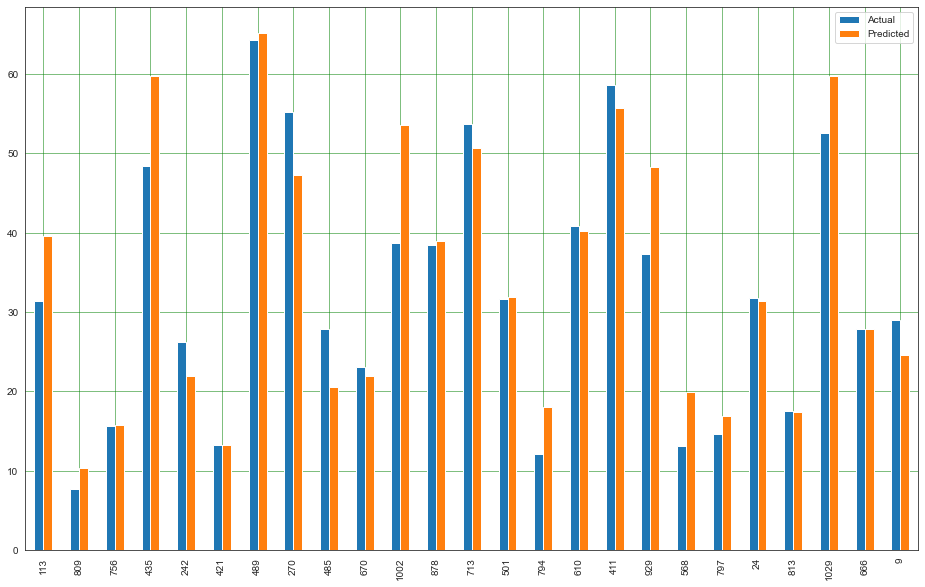

In [109]:
df_temp = df_pred.head(25)
df_temp.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### <a id = "link_PolynomialFeatures"></a>DecisionTreeRegressor with 2 degress of PolynomialFeatures

In [110]:
pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(x_train,y_train)

print(pipeline.score(x_train,y_train))

print(pipeline.score(x_test,y_test))

0.9961253299308925
0.8305483505195441


### DecisionTreeRegressor with 3 degress of PolynomialFeatures

In [111]:
#Degree 3

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=3)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(x_train,y_train)

print(pipeline.score(x_train,y_train))

print(pipeline.score(x_test,y_test))

0.9961253299308925
0.8081413786999805


As it is visible that highest testing score is in degree one so going fprward with degree 1

To capture different model performance statistics

In [112]:
algo= []
cv_r2_mean = []
cv_r2_std = []
cv_rmse_mean = []

### <a id = "link_LinearRegressionk"></a>LinearRegression (K Fold)

In [113]:
k =  KFold(random_state=7,n_splits=5)
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('reg', LinearRegression())
])


algo.append('Linear Regression')
cv_r2_mean.append(cross_val_score(pipeline, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(pipeline, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(pipeline, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [114]:
cross_val_score(pipeline, x_train, y_train, cv=k).mean()

0.7385953648223873

When we use mean squared error as scoring in cross val score it gives output with a negative sign. So we use Negative sign to make it positive.

### <a id = "link_DecisionTreeRegressork"></a>DecisionTreeRegressor K Fold

In [115]:
model = DecisionTreeRegressor(random_state=7)


algo.append('Decision Tree')
cv_r2_mean.append(cross_val_score(model, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [116]:
cross_val_score(model, x_train, y_train, cv=k).mean()

0.7949526580337304

### <a id = "link_RandomForestRegressork"></a>RandomForestRegressor K Fold

In [117]:
model = RandomForestRegressor(random_state=7)


algo.append('Random Forest')
cv_r2_mean.append(cross_val_score(model, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [118]:
cross_val_score(model, x_train, y_train, cv=k).mean()

0.880728432892339

### <a id = "link_BaggingRegressor"></a>BaggingRegressor

In [119]:
model = BaggingRegressor(random_state=7)


algo.append('Bagging')
cv_r2_mean.append(cross_val_score(model, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [120]:
cross_val_score(model, x_train, y_train, cv=k).mean()

0.8719360658302431

### <a id = "link_AdaBoostRegressor"></a>AdaBoostRegressor

In [121]:
model = AdaBoostRegressor(random_state=7)


algo.append('AdaBoost')
cv_r2_mean.append(cross_val_score(model, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

### <a id = "link_GradientBoostingRegressor"></a>GradientBoostingRegressor

In [122]:
model = GradientBoostingRegressor(random_state=7)


algo.append('Gradient Boosting')
cv_r2_mean.append(cross_val_score(model, x_train, y_train, cv=k).mean())
cv_r2_std.append(cross_val_score(model, x_train, y_train, cv=k).std())
cv_rmse_mean.append((-cross_val_score(model, x_train, y_train, cv=k,scoring='neg_mean_squared_error').mean())**0.5)

In [123]:
cross_val_score(model, x_train, y_train, cv=k).mean()

0.8854851621926327

### <a id = "link_DataFrame"></a>DataFrame to compare results

In [124]:
results = pd.DataFrame()
results['Model'] = algo
results['CV R2 score mean'] = cv_r2_mean
results['CV R2 score std'] = cv_r2_std
results['CV RMSE'] = cv_rmse_mean
results = results.set_index('Model')
results

CV R2 score mean  CV R2 score std   CV RMSE
Model                                                         
Linear Regression          0.738595         0.014844  8.343648
Decision Tree              0.794953         0.016311  7.391328
Random Forest              0.880728         0.019090  5.658161
Bagging                    0.871936         0.020383  5.869827
AdaBoost                   0.763287         0.023629  7.933814
Gradient Boosting          0.885485         0.013357  5.550754

### <a id = "link_Grid"></a>Grid Search on Random Forest

In [125]:
rf = RandomForestRegressor(random_state=7)

params = {
    'bootstrap': [True,False],
    'max_depth': [3,4,None],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,3, 4],
    'min_samples_split': [2,3,5],
    'n_estimators': [25,50,'warn']
}    

grid = GridSearchCV(estimator = rf, param_grid = params, cv = k)

grid.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
             estimator=RandomForestRegressor(random_state=7),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 4, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [25, 50, 'warn']})

In [126]:
model = ['Random forest after Grid search']
tr = [grid.score(x_train,y_train)]
te = [grid.score(x_test,y_test)]
rmse = [mean_squared_error(y_test,grid.predict(x_test))**0.5]

### <a id = "link_Gradient"></a>Random Search on Gradient Boosting

In [127]:
gb = GradientBoostingRegressor(random_state=7)
gb.fit(x_train,y_train)

GradientBoostingRegressor(random_state=7)

In [128]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50 , stop = 150, num = 25)]   # returns evenly spaced 25 numbers
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 5)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
learning_rate = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Create the random grid
params_r = {'n_estimators': n_estimators,
            'max_features': max_features,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf,
            'learning_rate':learning_rate}

# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
random = RandomizedSearchCV(estimator=gb, param_distributions=params_r,cv = k, random_state=7)

# Fit the random search model
random.fit(x_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=False),
                   estimator=GradientBoostingRegressor(random_state=7),
                   param_distributions={'learning_rate': [0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5, 0.6,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'max_depth': [5, 6, 7, 8, 10, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [50, 54, 58, 62, 66, 70,
                         

In [129]:
random.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'learning_rate': 0.1}

In [130]:
model.append('Gradient Boosting after RandomCV')
tr.append(random.score(x_train,y_train))
te.append(random.score(x_test,y_test))
rmse.append(mean_squared_error(y_test,random.predict(x_test))**0.5)

In [131]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = model
results['Training Score'] = tr
results['Testing Score'] = te
results['RMSE'] = rmse
results = results.set_index('Model')
results

Training Score  Testing Score      RMSE
Model                                                                    
Random forest after Grid search         0.996125       0.921927  4.500233
Gradient Boosting after RandomCV        0.994950       0.937390  4.030001

Gradient Boosting gives better results after hyperparameter tuning as well

Hence our final model was able to explain 93.7 % variance was explained by the model from all the independent variables with RMSE score of 4 Mpa in concrete strength

Our final model is slightly overfit but the testing score is high enough so we can use this model for now or we can try to reduce noise by changing parameters

# <a id = "link_Classification"></a>Classification Samples

# <a id = "link_prediction"></a>Regression for classification variable prediction

In [132]:
X = prima_df.drop('class',axis=1)     # Predictor feature columns (8 X m)
Y = prima_df['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [133]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1       2         3         4         5         6  \
0  0.093243  0.026416 -0.0276 -0.012902 -0.000155  0.075966  0.342182   

          7  intercept  
0  0.013504  -4.975624  


In [134]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7835497835497836


In [135]:
z = pd.DataFrame()                                               # creating a new dataframe
z['Actual'] = y_test.values                                      # Storing actual output of target variable

z['Probaility that output is 0'] = model.predict_proba(x_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = model.predict_proba(x_test)[:,1]

z['Predicted'] = model.predict(x_test)                               # Predicting target variable using sklearn Logistic regression

z.head()

# In sklearn default threshold is 0.5
# therfore for all the values whose probability for 1 is greater than 0.5 will be predicted as 1

Actual  Probaility that output is 0  Probaility that output is 1  Predicted
0       0                     0.560667                     0.439333          0
1       0                     0.647642                     0.352358          0
2       0                     0.773989                     0.226011          0
3       0                     0.918000                     0.082000          0
4       0                     0.754585                     0.245415          0

In [136]:
z = x_test.copy()
z['Observed Loan Status'] = y_test
z['Predicted Loan Status'] = y_predict
z.head()

Preg   Plas  Pres      skin        test  mass   pedi  age  \
285     7  136.0  74.0  26.00000  135.000000  26.0  0.647   51   
101     1  151.0  60.0  29.15342  155.548223  26.1  0.179   22   
581     6  109.0  60.0  27.00000  155.548223  25.0  0.206   27   
352     3   61.0  82.0  28.00000  155.548223  34.4  0.243   46   
726     1  116.0  78.0  29.00000  180.000000  36.1  0.496   25   

     Observed Loan Status  Predicted Loan Status  
285                     0                      0  
101                     0                      0  
581                     0                      0  
352                     0                      0  
726                     0                      0

### <a id = "link_Statsmodel"></a>Regression for classification variable prediction with Statsmodel

In [137]:
X = credit_df.drop("Creditability",axis=1)
Y = credit_df.Creditability.astype('category')

In [138]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )

logit = sm.Logit( y_train, sm.add_constant( X_train ) )

lg = logit.fit()

lg.summary2()

Optimization terminated successfully.
         Current function value: 0.584201
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.040     
Dependent Variable:    Creditability      AIC:                823.8815  
Date:                  2020-12-15 17:55   BIC:                837.5347  
No. Observations:      700                Log-Likelihood:     -408.94   
Df Model:              2                  LL-Null:            -425.90   
Df Residuals:          697                LLR p-value:        4.3260e-08
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                     1.7329   0.1790  9.6834 0.0000  1.3822  2.0837
CreditAmount             -0.0000   0.0000 -0.2156 0.8293 -0.0001  0.0001
DurationOfCreditInMonths -0.0379   0.0087 -4.3657 0.0000 -0.0549 -0.0209
========================================================================

"""

Convert probabilities to target variable

In [139]:
y_pred_df = pd.DataFrame()

y_pred_df['actual'] = y_test

y_pred_df["predicted_prob"] = lg.predict( sm.add_constant( X_test ) )
## Used statsmodel logit function to predict probaility of output being from class '1'

y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'.
## Therefore thershold here is 0.6 as values above 0.6 probability is converted to '1'

y_pred_df[0:5]

actual  predicted_prob  predicted
521      0        0.570130          0
737      1        0.739201          1
740      1        0.779808          1
660      1        0.805127          1
411      1        0.689988          1

#### confusion matrix for classification

In [140]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Default", "No Default"] , yticklabels = ["Default", "No Default"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

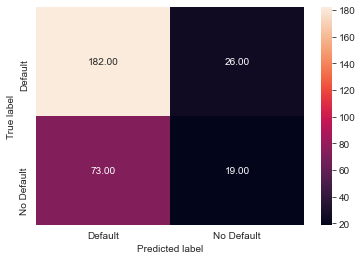

In [141]:
draw_cm( y_pred_df.actual, y_pred_df.predicted )

# <a id = "link_DecisionTreeClassifier"></a>DecisionTreeClassifier

In [142]:
x_train, x_test, y_train, y_test =train_test_split(wine_df.drop('quality',axis=1), wine_df['quality'], test_size=.25,
                                                   random_state=7)

In [143]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [144]:
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [145]:
model_entropy.score(x_train, y_train)  # performance on train data

1.0

In [146]:
model_entropy.score(x_test, y_test)  # performance on test data

0.6375

#### There is a high degree of overfitting in the model due to which the test accuracy drops drastically. This shows why decision trees are prone to overfitting. 

#### Regularize/prune the decision tree by limiting the max. depth of trees and print the accuracy.

In [147]:
#clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
#clf_pruned.fit(x_train, y_train)

#### Reducing over fitting (Regularization/Pruning) by limiting the max. depth of trees and print the accuracy.

In [148]:
model_entropy_regularized=DecisionTreeClassifier(criterion='entropy',  max_depth = 3, min_samples_leaf=5, random_state=7)

In [149]:
model_entropy_regularized.fit(x_train, y_train)
model_entropy_regularized.score(x_train, y_train)  # performance on train data

0.6155129274395329

In [150]:
model_entropy_regularized.score(x_test, y_test)  # performance on test data

0.595

In [151]:
y_pred = model_entropy_regularized.predict(x_test)

In [152]:
# Confusion matrix
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted    5   6   7
Actual                
5          136  38   1
6           79  79  16
7            6  22  23

In [153]:
acc_DT = accuracy_score(y_test, y_pred)

##### <a id = "link_probability"></a>Display probability for each class

In [154]:
features = [col for col in wine_df.columns if col != 'quality']

In [155]:
wine_df['ProbQuality_5'] = model_entropy_regularized.predict_proba(wine_df[features])[:,0]
wine_df['ProbQuality_6'] = model_entropy_regularized.predict_proba(wine_df[features])[:,1]
wine_df['ProbQuality_8'] = model_entropy_regularized.predict_proba(wine_df[features])[:,2]
wine_df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  ProbQuality_5  ProbQuality_6  ProbQuality_8  
0      9.4        5       0.738197       0.257511       0.004292  
1      9.8        5       0.738197       0.257511       0.004292  
2      9.8        5       0.738197       0.257511       0.004292  
3      9.8        6       0.738197       0.257511       0.004292  
4      9.4        5       0.738197       0.257511       0.004292  
5      9.4        5       0.738197       0.257511       0.004292  
6      9.4        5       0.738197       0.257511       0.004292  
7     10.0        7       0.522449       0.404082       0.073469  
8      9.5        7       0.738197       0.257511       0.004292  
9     10.5        5       0.522449       0.404082       0.073469

#### <a id = "link_importance"></a>Feature importance

In [156]:
## Calculating feature importance

feat_importance = model_entropy_regularized.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, model_entropy_regularized.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
alcohol               0.750121
volatile acidity      0.140410
fixed acidity         0.062545
sulphates             0.046923
citric acid           0.000000
residual sugar        0.000000
chlorides             0.000000
free sulfur dioxide   0.000000
total sulfur dioxide  0.000000
density               0.000000
pH                    0.000000

In [157]:
# pront feature impoartance in pandas data frame
pd.Series(model_entropy_regularized.feature_importances_, x_train.columns ).sort_values(ascending= False)

alcohol                 0.750121
volatile acidity        0.140410
fixed acidity           0.062545
sulphates               0.046923
pH                      0.000000
density                 0.000000
total sulfur dioxide    0.000000
free sulfur dioxide     0.000000
chlorides               0.000000
residual sugar          0.000000
citric acid             0.000000
dtype: float64

In [158]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree     0.595

## <a id = "link_KNeighborsClassifier"></a>KNeighborsClassifier

In [159]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
knn_clf = KNeighborsClassifier()

In [161]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [162]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

In [163]:
gs = GridSearchCV(knn_clf,param_grid,cv=10)

In [164]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [165]:
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 1}

In [166]:
knn_clf_best = KNeighborsClassifier(algorithm='auto',n_neighbors=1)
knn_clf_best.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [167]:
pred_knn = knn_clf.predict(x_test)
acc_knn = accuracy_score(y_test, pred_knn)

In [168]:
acc_knn

0.5175

In [169]:
pred_knn_best = knn_clf_best.predict(x_test)
acc_knn_best = accuracy_score(y_test, pred_knn_best)

In [170]:
acc_knn_best

0.6175

## <a id = "link_RandomForestClassifier"></a>RandomForestClassifier

In [171]:
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(x_train, y_train)

In [172]:
pred_RF = rfcl.predict(x_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [173]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree     0.595
0  Random Forest     0.725

### <a id = "link_AdaBoostClassifier"></a>AdaBoostClassifier - Adaboost Ensemble Algorithm

In [174]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)

In [175]:
pred_AB =abcl.predict(x_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [176]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree     0.595
0  Random Forest     0.725
0       Adaboost     0.640

### <a id = "link_BaggingClassifiere"></a>BaggingClassifier - 

In [177]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)

In [178]:
pred_BG = bgcl.predict(x_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [179]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree    0.5950
0  Random Forest    0.7250
0       Adaboost    0.6400
0        Bagging    0.7075

### <a id = "link_GradientBoostingClassifiere"></a>GradientBoostingClassifier

In [180]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)

In [181]:
pred_GB = gbcl.predict(x_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [182]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0   Decision Tree    0.5950
0   Random Forest    0.7250
0        Adaboost    0.6400
0         Bagging    0.7075
0  Gradient Boost    0.6600

#### Feature importance

In [183]:
pd.Series(gbcl.feature_importances_, x_train.columns ).sort_values(ascending= False)

alcohol                 0.367360
sulphates               0.128763
total sulfur dioxide    0.115003
volatile acidity        0.108707
fixed acidity           0.049610
free sulfur dioxide     0.048727
pH                      0.044841
residual sugar          0.039876
density                 0.034465
chlorides               0.032864
citric acid             0.029784
dtype: float64

### <a id = "link_Scaling"></a>Scaling

In [184]:
#MinMax Scaling - scales the data set such that all feature values are in the range [0, 1].
#StandardScaler - removes the mean and scales the data to unit variance
flight_df_coded = pd.get_dummies(flight_df)

In [185]:
#Here we are going to use StandardScaler to scale our data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#What all columns to scale? I have preferred all columns except onehotencoded columns and target columns as
#scaling of target feature will not change anything as they already have values like 0 and 1 only.
#You may only scale numerical features and leave categorical features as required according to business problem need and results.
cols_to_scale = ['Seat_comfort', 'Departure.Arrival.time_convenient',
       'Food_drink', 'Gate_location', 'Inflightwifi_service',
       'Inflight_entertainment', 'Online_support', 'Ease_of_Onlinebooking',
       'Onboard_service', 'Leg_room_service', 'Baggage_handling',
       'Checkin_service', 'Cleanliness', 'Online_boarding',
       'Age', 'Flight_Distance','DepartureDelayin_Mins', 'ArrivalDelayin_Mins']

flight_df_coded[cols_to_scale] = scaler.fit_transform(flight_df_coded[cols_to_scale].to_numpy())

In [186]:
flight_df_coded.describe()

Seat_comfort  Departure.Arrival.time_convenient    Food_drink  \
count  9.091700e+04                       8.267300e+04  8.273600e+04   
mean  -6.216541e-16                       6.874350e-17 -3.685222e-17   
std    1.000005e+00                       1.000006e+00  1.000006e+00   
min   -2.037086e+00                      -1.962502e+00 -1.975111e+00   
25%   -6.019276e-01                      -6.512173e-01 -5.891175e-01   
50%    1.156515e-01                       4.425248e-03  1.038791e-01   
75%    8.332305e-01                       6.600678e-01  7.968758e-01   
max    1.550810e+00                       1.315710e+00  1.489872e+00   

       Gate_location  Inflightwifi_service  Inflight_entertainment  \
count   9.091700e+04          9.091700e+04            9.091700e+04   
mean   -1.286394e-16          4.749572e-16            8.654207e-16   
std     1.000005e+00          1.000005e+00            1.000005e+00   
min    -2.286429e+00         -2.463102e+00           -2.521293e+00   
25%    -7.572541e-01         -9.480736e-01           -1.031147e+00   
50%     7.333284e-03         -1.905596e-01            4.589988e-01   
75%     7.719207e-01          5.669545e-01            4.589988e-01   
max     1.536508e+00          1.324469e+00            1.204072e+00   

       Online_support  Ease_of_Onlinebooking  Onboard_service  \
count    9.091700e+04           9.091700e+04     8.373800e+04   
mean     7.585582e-16          -1.460263e-15    -4.346254e-16   
std      1.000005e+00           1.000005e+00     1.000006e+00   
min     -2.690907e+00          -2.664014e+00    -2.730890e+00   
25%     -3.969552e-01          -1.131038e+00    -3.675079e-01   
50%      3.676953e-01           4.019391e-01     4.202859e-01   
75%      1.132346e+00           1.168428e+00     4.202859e-01   
max      1.132346e+00           1.168428e+00     1.208080e+00   

       Leg_room_service  ...  Satisfaction_satisfied  Gender_Female  \
count      9.091700e+04  ...            90917.000000   90917.000000   
mean      -1.035699e-15  ...                0.547323       0.508002   
std        1.000005e+00  ...                0.497758       0.499939   
min       -2.699433e+00  ...                0.000000       0.000000   
25%       -1.151146e+00  ...                0.000000       0.000000   
50%        3.971404e-01  ...                1.000000       1.000000   
75%        1.171284e+00  ...                1.000000       1.000000   
max        1.171284e+00  ...                1.000000       1.000000   

        Gender_Male  CustomerType_Loyal Customer  \
count  90917.000000                 90917.000000   
mean       0.491998                     0.735803   
std        0.499939                     0.440907   
min        0.000000                     0.000000   
25%        0.000000                     0.000000   
50%        0.000000                     1.000000   
75%        1.000000                     1.000000   
max        1.000000                     1.000000   

       CustomerType_disloyal Customer  TypeTravel_Business travel  \
count                    90917.000000                90917.000000   
mean                         0.164117                    0.621237   
std                          0.370383                    0.485082   
min                          0.000000                    0.000000   
25%                          0.000000                    0.000000   
50%                          0.000000                    1.000000   
75%                          0.000000                    1.000000   
max                          1.000000                    1.000000   

       TypeTravel_Personal Travel  Class_Business     Class_Eco  \
count                90917.000000    90917.000000  90917.000000   
mean                     0.278804        0.478843      0.448299   
std                      0.448413        0.499555      0.497323   
min                      0.000000        0.000000      0.000000   
25%                      0.000000        0.000000      0.000000   
50%     

In [187]:
flight_df_coded.head()

Seat_comfort  Departure.Arrival.time_convenient  Food_drink  \
Id                                                                    
198671     -1.319507                           0.004425    0.103879   
193378      1.550810                          -0.651217    1.489872   
174522      0.833231                           0.660068    0.796876   
191830      0.833231                           0.660068    0.796876   
221497      0.833231                           0.660068         NaN   

        Gate_location  Inflightwifi_service  Inflight_entertainment  \
Id                                                                    
198671       0.007333             -1.705588               -1.031147   
193378       0.771921             -0.190560                1.204072   
174522       0.007333             -0.190560                1.204072   
191830       0.007333             -1.705588                0.458999   
221497       0.771921              0.566954                0.458999   

        Online_support  Ease_of_Onlinebooking  Onboard_service  \
Id                                                               
198671       -1.926256              -1.897526        -0.367508   
193378       -0.396955              -0.364549         0.420286   
174522        1.132346              -1.131038        -1.155302   
191830       -1.926256              -1.897526        -1.943096   
221497        0.367695               0.401939         0.420286   

        Leg_room_service  ...  Satisfaction_satisfied  Gender_Female  \
Id                        ...                                          
198671         -0.377003  ...                       0              0   
193378         -0.377003  ...                       1              1   
174522          0.397140  ...                       1              1   
191830          0.397140  ...                       1              0   
221497          0.397140  ...                       1              0   

        Gender_Male  CustomerType_Loyal Customer  \
Id                                                 
198671            1                            1   
193378            0                            0   
174522            0                            0   
191830            1                            0   
221497            1                            1   

        CustomerType_disloyal Customer  TypeTravel_Business travel  \
Id                                                                   
198671                               0                           1   
193378                               1                           0   
174522                               0                           0   
191830                               1                           1   
221497                               0                           1   

        TypeTravel_Personal Travel  Class_Business  Class_Eco  Class_Eco Plus  
Id                                                                             
198671                           0               1          0               0  
193378                           0               1          0               0  
174522                           1               0          0               1  
191830                           0               0          1               0  
221497                           0               1          0               0  

[5 rows x 29 columns]